# Proyek Analisis Data: Bike Sharing Dataset 
- **Nama: Ahmad Raihan** 
- **Email: ahmadraihan154@gmail.com** 
- **ID Dicoding: -** 

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa layanan penyewaan sepeda berdasarkan jumlah pengguna selama 2011-2012?

2. Bagaimana performa peminjaman sepeda pada hari kerja dibandingkan dengan akhir pekan dan hari libur?

3. Bagaimana performa peminjaman sepeda dalam berbagai kondisi cuaca yang berbeda?

4. Bagaimana pola peminjaman sepeda berdasarkan musim dan apakah ada perbedaan antara hari kerja dan hari libur?

5. Pada jam berapa jumlah peminjaman sepeda mencapai puncaknya dan kapan paling rendah?

6. Bagaimana hubungan antara faktor lingkungan seperti temperatur, kecepatan angin, dan kelembaban dengan jumlah peminjaman sepeda?

7. Kapan terakhir kali penyewaan sepeda mencapai puncaknya, serta bagaimana tingkat frekuensi dan total penyewaan dari masing-masing kelompok pengguna?

## Import Semua Packages/Library yang Digunakan

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [245]:
# Memuat data dari bike sharing dataset

## 1. Data Day
day_df = pd.read_csv('D:\Belajar Streamlit\Bike-sharing-dataset\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [246]:
## 2. Data Hour
hour_df = pd.read_csv('D:\Belajar Streamlit\Bike-sharing-dataset\hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
1. Dataset Bike Sharing terdiri dari dua file:
    - hour.csv: Berisi jumlah penyewaan sepeda yang dihitung per jam dengan total 17.379 data
    - day.csv: Berisi jumlah penyewaan sepeda yang dihitung per hari dengan total 731 data

2. Kedua file (hour.csv dan day.csv) memiliki kolom yang sama, kecuali kolom hr (jam), yang hanya tersedia dalam hour.csv

### Assessing Data

#### 1. Data Day

In [247]:
# 1. Mengecek informasi umum data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [248]:
# 2. Mengecek apakah ada data yang missing
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [249]:
# 3. Mengecek apakah ada data yang duplikat
print(f'Jumlah data yang duplikat : {day_df.duplicated().sum()}')

Jumlah data yang duplikat : 0


In [250]:
# 4. Mengecek informasi statistik data
day_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


#### 2. Data Hour

In [251]:
# 1. Mengecek informasi umum data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [252]:
# 2. Mengecek apakah ada data yang missing
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [253]:
# 4. Mengecek apakah ada data yang duplikat
print(f'Jumlah data yang duplikat : {hour_df.duplicated().sum()}')

Jumlah data yang duplikat : 0


In [254]:
# 4. Mengecek informasi statistik data
hour_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


**Insight:**
1. Menghapus kolom instant dari data day dan hour karena tidak memberikan informasi yang berguna.

1. Menghapus kolom holiday karena informasi mengenai hari libur sudah tercakup dalam workingday, yang membedakan antara hari kerja dan hari libur (termasuk akhir pekan dan hari libur nasional).

1. Baik pada data day dan data hour tidak ada yang missing (hilang) dan duplikat.

1. Kolom dteday dari data day dan hour perlu diubah yang awalnya object menjadi datetime untuk mempermudah analisis data.

1. Beberapa kolom seperti season, mnth, holiday, weekday, workingday, dan weathersit dari data day dan hour yang awalnya bertipe int perlu diubah menjadi object dikarenakan nilainya bersifat diskrit (kategori).

1. Mengganti nama kolom seperti yr, mnth, dsb dari agar lebih mudah dibaca.

1. Mengganti isi kolom seperti season, yr, weekday, dsb dalam format yang informatif.

1. Nilai-nilai dari kolom seperti temp, atemp, dsb yang telah dinormalisasi dari data day dan hour, perlu dikembalikan ke skala aslinya agar memperjelas interpretasi data.

### Cleaning Data
- Data ini akan dibersihkan berdasarkan hasil assesing diatas

In [255]:
# 1. Menghapus Kolom instant dan holiday baik pada data day dan hour

day_df = day_df.drop(columns=['instant', 'holiday'])
hour_df = hour_df.drop(columns=['instant', 'holiday']) 

In [256]:
# 2. Mengubah tipe data kolom dteday menjadi datetime baik pada data day dan hour

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [257]:
# 3. Mengubah tipe data kolom seperti season, mnth, dsb yang awalnya int menjadi object

column_change = ['season', 'mnth', 'weekday', 'workingday', 'weathersit']

for col in column_change:
    day_df[col] = day_df[col].astype(str)
    hour_df[col] = hour_df[col].astype(str)

In [258]:
# 4. Mengubah nama kolom agar lebih mudah dibaca

day_df = day_df.rename(columns={"dteday": "date", "yr": "year", "mnth": "month", "weathersit": "weather_condition", "temp" : "temperature", "atemp": "feeling_temperature", "hum": "humidity", "cnt": "combined_users", "casual": "casual_users", "registered": "registered_users", "workingday": "is_workingday"}) 
hour_df = hour_df.rename(columns={"dteday": "date", "yr": "year", "mnth": "month", "hr": "hour", "weathersit": "weather_condition", "temp" : "temperature", "atemp": "feeling_temperature", "hum": "humidity", "cnt": "combined_users", "casual": "casual_users", "registered": "registered_users", "workingday": "is_workingday"}) 

In [259]:
# 5. Mengganti isi kolom dari data day dan hour dalam format yang informatif

# Mengubah kode musim menjadi nama musim lengkap (Spring, Summer, Fall, Winter)
day_df['season'] = day_df['season'].map({'1': 'Spring', '2': 'Summer', '3': 'Fall', '4': 'Winter'})
hour_df['season'] = hour_df['season'].map({'1': 'Spring', '2': 'Summer', '3': 'Fall', '4': 'Winter'})    

# Mengubah kode tahun menjadi tahun aktual (2011, 2012)
day_df['year'] = day_df['year'].map({0: 2011, 1: 2012})
hour_df['year'] = hour_df['year'].map({0: 2011, 1: 2012})    

# Mengubah kode bulan menjadi nama bulan lengkap (January - December)
day_df['month'] = day_df['month'].map({'1': "January", '2': "February", '3': "March", '4': "April", '5': "May", '6': "June",'7': "July", '8': "August", '9': "September", '10': "October", '11': "November", '12': "December"})  
hour_df['month'] = hour_df['month'].map({'1': "January", '2': "February", '3': "March", '4': "April", '5': "May", '6': "June",'7': "July", '8': "August", '9': "September", '10': "October", '11': "November", '12': "December"})  

# Mengubah kode hari menjadi nama hari lengkap (Sunday - Saturday)
day_df['weekday'] = day_df['weekday'].map({'0': "Sunday", '1': "Monday", '2': "Tuesday", '3': "Wednesday", '4': "Thursday", '5': "Friday", '6': "Saturday"})
hour_df['weekday'] = hour_df['weekday'].map({'0': "Sunday", '1': "Monday", '2': "Tuesday", '3': "Wednesday", '4': "Thursday", '5': "Friday", '6': "Saturday"})  

# Mengubah kode cuaca menjadi kondisi cuaca lengkap (Clear, Mist, Light Rain Snow, Heavy Rain Snow)
day_df['weather_condition'] = day_df['weather_condition'].map({'1': "Clear", '2': "Mist", '3': "Light Rain Snow", '4': "Heavy Rain Snow"})
hour_df['weather_condition'] = hour_df['weather_condition'].map({'1': "Clear", '2': "Mist", '3': "Light Rain Snow", '4': "Heavy Rain Snow"})  


In [260]:
# 6. Mengembalikan nilai yang telah dinormalisasi ke standar awal

day_df["temperature"] = day_df["temperature"] * 41
hour_df["temperature"] = hour_df["temperature"] * 41

day_df["feeling_temperature"] = day_df["feeling_temperature"] * 50
hour_df["feeling_temperature"] = hour_df["feeling_temperature"] * 50

day_df["humidity"] = day_df["humidity"] * 100
hour_df["humidity"] = hour_df["humidity"] * 100

day_df["windspeed"] = day_df["windspeed"] * 67
hour_df["windspeed"] = hour_df["windspeed"] * 67

**Insight:**
- Dari proses di atas, dapat disimpulkan bahwa data day dan hour telah mengalami beberapa perbaikan, yaitu:

    - sudah menghapus kolom instant dan holiday karena tidak memberikan informasi yang berguna. ✓
    
    - Tidak ada data yang missing atau duplikat pada dataset day dan hour. ✓
    
    - Tipe data pada kolom dteday sudah berubah menjadi datetime untuk mempermudah analisis. ✓
    
    - Tipe data int pada kolom season, yr, mnth, weekday, workingday, dan weathersit sudah diubah menjadi tipe kategori agar lebih sesuai. ✓
    
    - Sudah mengganti nama kolom agar lebih mudah dibaca dan dipahami. ✓
    
    - Sudah mengonversi isi kolom agar lebih informatif. ✓
    
    - Sudah melakukan denormalisasi nilai pada kolom seperti temperature, feeling_temperature, humidity, dan windspeed agar lebih mudah diinterpretasikan. ✓

## Exploratory Data Analysis (EDA)

### Explor Data hour_df 

In [261]:
hour_df.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date,17379,NaN,NaN,NaN,2012-01-02 04:08:34.552045568,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-02 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
season,17379,4,Fall,4496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,17379.0,NaN,NaN,NaN,2011.502561,2011.0,2011.0,2012.0,2012.0,2012.0,0.500008
month,17379,12,July,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,17379.0,NaN,NaN,NaN,11.546752,0.0,6.0,12.0,18.0,23.0,6.914405
weekday,17379,7,Saturday,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_workingday,17379,2,1,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_condition,17379,4,Clear,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,17379.0,NaN,NaN,NaN,20.376474,0.82,13.94,20.5,27.06,41.0,7.894801
feeling_temperature,17379.0,NaN,NaN,NaN,23.788755,0.0,16.665,24.24,31.06,50.0,8.592511


### Insight

1.  Hour
- Rata-rata hour dalam data adalah 11.55 dan standar deviasinya 6.91, dengan nilai minimal 0 (tengah malam) dan maksimal 23 (hampir tengah malam).
- Kita bisa lihat berapa jumlah pengguna yang menyewa berdasarkan jamnya.

In [262]:
hour_df.groupby('hour').agg({'combined_users':'sum'}).sort_values(by ='combined_users', ascending=False)

,combined_users
hour,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


- Berdasarkan pivot table di atas, dapat diketahui bahwa jumlah penyewaan sepeda tertinggi terjadi pada pukul 17.00, sedangkan jumlah penyewaan terendah terjadi pada pukul 04.00.

2. users
- Jumlah penyewaan sepeda didominasi oleh registered user dengan rata-rata 153 penyewaan per jam, sementara casual user hanya 35 penyewaan per jam. Total user yang menyewa rata-rata mencapai 189, dengan fluktuasi signifikan, mulai dari 1 hingga 977 penyewaan per jam.

- Adapun jika ingin mengetahui total keseluruhan user yang telah menyewa adalah sebagai berikut

In [263]:
users = ['casual_users', 'registered_users', 'combined_users']

for user in users:
    print(f'Total dari {user} : {hour_df[user].sum()}')

Total dari casual_users : 620017
Total dari registered_users : 2672662
Total dari combined_users : 3292679


- Secara keseluruhan, total penyewaan sepeda selama periode yang diamati mencapai 3.292.679 penyewaan, dengan kontribusi terbesar berasal dari registered user sebanyak 2.672.662 penyewaan, sementara casual user menyumbang 620.017 penyewaan. 

3. weather condition
- Data hour_df memiliki 4 kategori cuaca, dengan kondisi cuaca yang paling sering muncul adalah Clear (cerah) sebanyak 11.413 entri.
- Adapun 4 kategori cuaca yang bisa dilihat adalah sebagai berikut:

In [264]:
hour_df['weather_condition'].unique()

array(['Clear', 'Mist', 'Light Rain Snow', 'Heavy Rain Snow'],
      dtype=object)

- Dari hasil diatas terdapat 4 kondisi cuaca yaitu clear, mist, light rain snow, dan heavy rain snow

### Explor Data day_df 

In [265]:
day_df.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date,731,NaN,NaN,NaN,2012-01-01 00:00:00,2011-01-01 00:00:00,2011-07-02 12:00:00,2012-01-01 00:00:00,2012-07-01 12:00:00,2012-12-31 00:00:00,NaN
season,731,4,Fall,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,731.0,NaN,NaN,NaN,2011.500684,2011.0,2011.0,2012.0,2012.0,2012.0,0.500342
month,731,12,January,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,731,7,Saturday,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_workingday,731,2,1,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_condition,731,3,Clear,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,731.0,NaN,NaN,NaN,20.310776,2.424346,13.820424,20.431653,26.872076,35.328347,7.505091
feeling_temperature,731.0,NaN,NaN,NaN,23.717699,3.95348,16.892125,24.33665,30.4301,42.0448,8.148059
humidity,731.0,NaN,NaN,NaN,62.789406,0.0,52.0,62.6667,73.02085,97.25,14.24291


### Insight

1. users
- Jumlah penyewaan sepeda didominasi oleh registered user dengan rata-rata 3.656 penyewaan per hari, sementara casual user hanya 848 penyewaan per hari. Total user yang menyewa rata-rata mencapai 4.504, dengan fluktuasi signifikan, mulai dari 22 hingga 8.714 penyewaan per hari.

- Jika melihat data sebelumnya (hour_df), total penyewaan sepeda selama periode yang diamati mencapai 3.292.679 penyewaan, dengan kontribusi terbesar berasal dari registered users sebanyak 2.672.662 penyewaan, sementara casual users menyumbang 620.017 penyewaan.

- Selain itu, menarik untuk dianalisis bagaimana jumlah pengguna antara casual dan registered berdasarkan tahunnya.

In [266]:
users = ['casual_users', 'registered_users', 'combined_users']

for user in users:
    print(f'Total dari {user} : {day_df[user].sum()}')

Total dari casual_users : 620017
Total dari registered_users : 2672662
Total dari combined_users : 3292679


In [267]:
pivot_year = day_df.pivot_table(values=['registered_users', 'casual_users'], index=['year'], aggfunc='sum')
pivot_year

,casual_users,registered_users
year,,
2011,247252,995851
2012,372765,1676811


- Berdasarkan hasil diatas, terjadi peningkatan jumlah penyewaan dari 2011 ke 2012, baik untuk casual users (247.252 → 372.765) maupun registered users (995.851 → 1.676.811).

2. Season
- Dari data statistik, variabel season memiliki 4 kategori season dengan Fall memiliki jumlah hari terbanyak (188 hari) dalam data ini.
- Untuk mengetahui lebih lanjut mengenai season lainnya dan bagaimana jumlah penyewaan sepeda pada season lainnya dapat dilihat dibawah:

In [268]:
pivot_season = day_df.pivot_table(values=['registered_users', 'combined_users', 'casual_users'], index=['season'], aggfunc='sum').sort_values(by='combined_users', ascending=False)
pivot_season = pivot_season.loc[:,['casual_users', 'registered_users', 'combined_users']]
pivot_season

,casual_users,registered_users,combined_users
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Spring,60622,410726,471348


- Dari hasil diatas diketahui bahwa season fall dan season summer merupakan season dengan penyewa terbanyak.

3. is_workingday
- variabel is_workingday memiliki dua nilai unik, yaitu 1 (hari kerja) dan 0 (hari libur) dengan mayoritas data menunjukkan bahwa terdapat 500 hari kerja dari total 731 hari.

- Adapun jika ingin mengetahui bagaimana perbandingan jumlah penyewa antara hari libur dan kerja adalah sebagai berikut:


In [269]:
pivot_workingday = day_df.pivot_table(values=['registered_users', 'combined_users', 'casual_users'], index=['is_workingday'], aggfunc='sum').sort_values(by='combined_users', ascending=False)
pivot_workingday = pivot_workingday.loc[:,['casual_users', 'registered_users', 'combined_users']]
pivot_workingday

,casual_users,registered_users,combined_users
is_workingday,,,
1,303285,1989125,2292410
0,316732,683537,1000269


- Dari hasil diatas diketahui bahwa total penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur, dengan mayoritas dari registered user di kedua kondisi.

4. weather_condition
- day_df hanya memiliki 3 kategori cuaca, dengan Clear (cerah) juga sebagai kondisi yang paling dominan sebanyak 463 entri.

- Adapun 3 kategori cuaca yang bisa dilihat adalah sebagai berikut:

In [270]:
day_df['weather_condition'].unique()

array(['Mist', 'Clear', 'Light Rain Snow'], dtype=object)

- Dari hasil diatas terdapat 3 kondisi cuaca yaitu clear, mist, dan light rain snow

-  Kondisi cuaca heavy rain snow kemungkinan terjadi hanya beberapa jam, sehingga tidak tercatat dalam ringkasan statistik day_df.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana performa layanan penyewaan sepeda berdasarkan jumlah pengguna selama 2011-2012?

In [271]:
# Kode untuk membuat membantu pembuatan line plot
day_df_month = day_df.groupby(day_df['date'].dt.to_period('Q')).agg({'combined_users':'sum'})

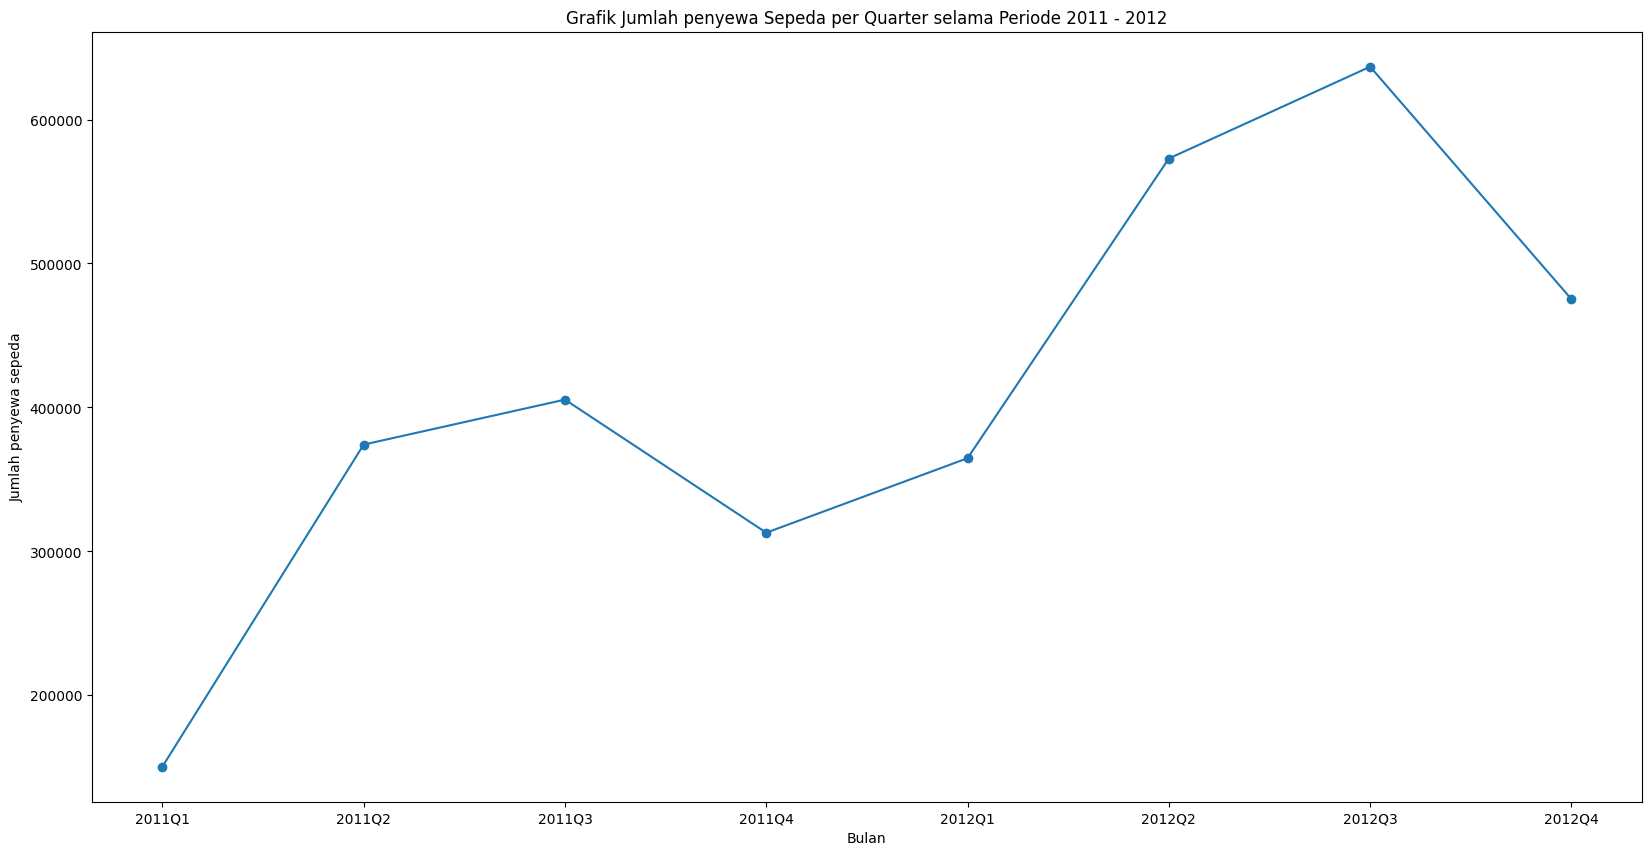

In [272]:
# Mengatur ukuran kanvas
plt.figure(figsize=(20, 10))

# membuat line plot untuk menghitung jumlah pelanggan per quarter
plt.plot(day_df_month.index.astype('str'), day_df_month.values, marker='o')

# Mengatur Elemen dari Grafik
plt.title('Grafik Jumlah penyewa Sepeda per Quarter selama Periode 2011 - 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah penyewa sepeda')

# menampilkan Grafik
plt.show()

### Insight

- Jumlah user menyewa sepeda mengalami peningkatan dan dari 2011 ke 2012. Puncak dari jumlah penyewa terjadi di Q2-Q3 (April-September). Namun ketika mau memasuki Q4 (Oktober-Desember) jumlah user mengalami penurunan.

### Pertanyaan 2:
Bagaimana performa peminjaman sepeda pada hari kerja dibandingkan dengan hari libur?

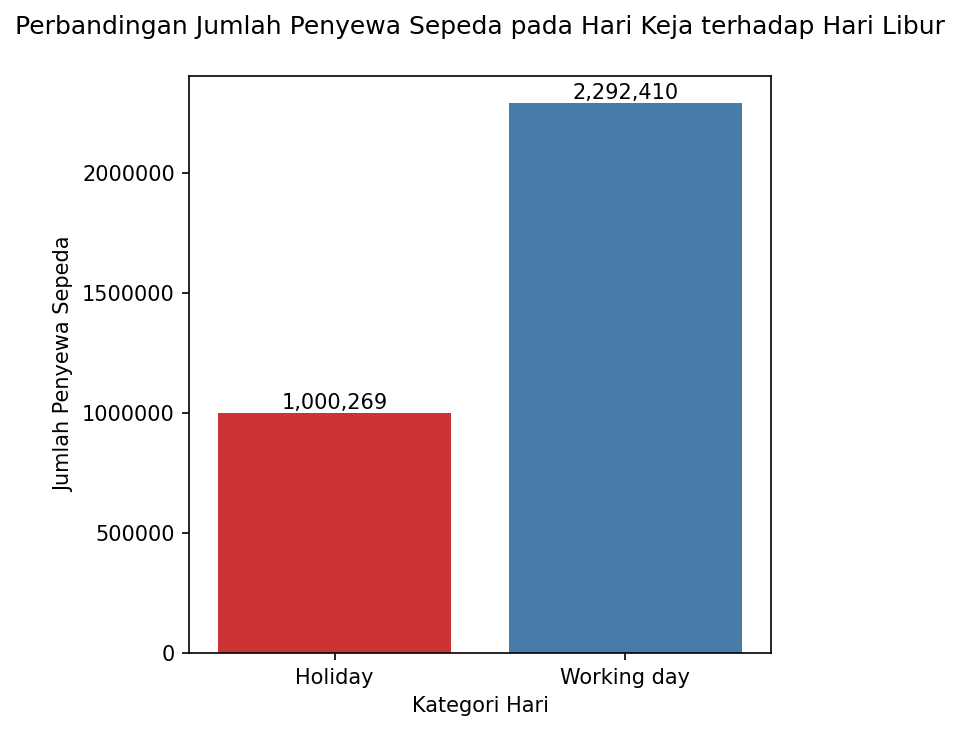

In [273]:
# Mengatur ukuran Kanvas
plt.figure(figsize=(5,5), dpi=150)

# Membuat Grafik Barchart 
g = sns.barplot(data=day_df, x='is_workingday', y='combined_users', hue='is_workingday', palette='Set1', errorbar=None, estimator=sum)

# Mengatur Elemen dari Grafik
plt.title('Perbandingan Jumlah Penyewa Sepeda pada Hari Keja terhadap Hari Libur', pad=20)
plt.xticks(ticks= [0,1], labels=['Holiday', 'Working day'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Kategori Hari')
plt.ylabel('Jumlah Penyewa Sepeda')

# Menampilkan Label Angka pada Grafik
for p in g.patches:
    g.annotate(f'{int(p.get_height()):,}',  
               (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha='center', va='bottom', color='black', fontsize=10)

# Menampilkan Grafik
plt.show()

### Insight

Berdasarkan hasil grafik di atas, dapat dilihat bahwa penyewaan sepeda paling banyak digunakan pada hari kerja dengan total sekitar 2.292.410 penyewaan. Sedangkan, penyewaan pada hari libur jauh lebih rendah, hanya sekitar 1.000.269 penyewaan.

### Pertanyaan 3:
Bagaimana performa peminjaman sepeda dalam berbagai kondisi cuaca yang berbeda?

In [274]:
# kode ini berguna untuk pengurutan data dalam grafik

day_df_weather = day_df.groupby('weather_condition').agg({'combined_users':'sum'}).sort_values(by='combined_users',ascending=False).reset_index()
hour_df_weather = hour_df.groupby('weather_condition').agg({'combined_users':'sum'}).sort_values(by='combined_users',ascending=False).reset_index()

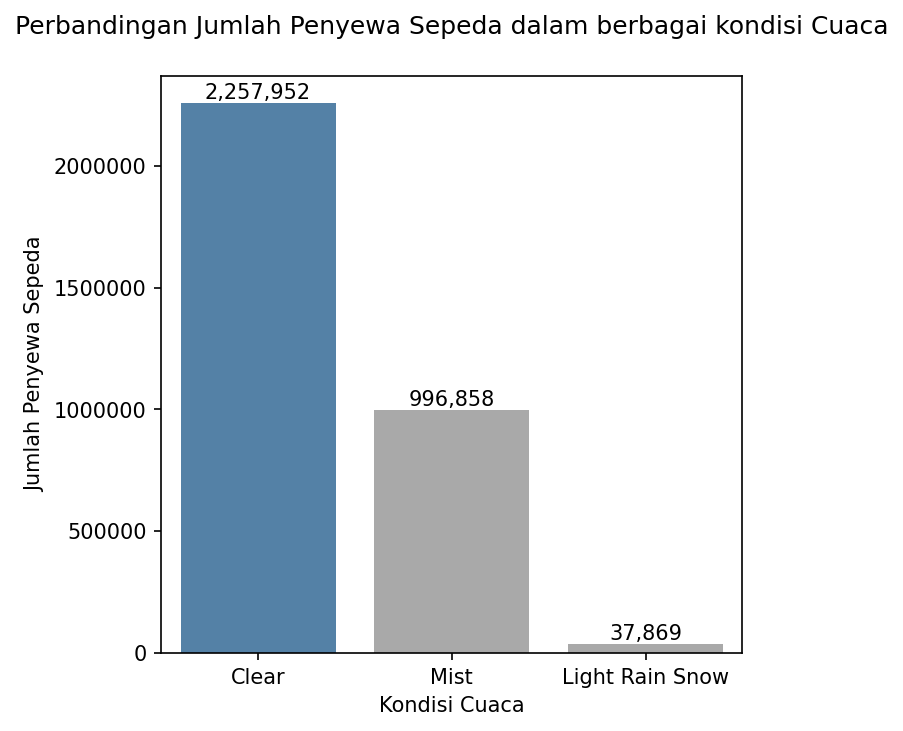

In [275]:
# Mengatur ukuran Kanvas
plt.figure(figsize=(5,5), dpi=150)

# Membuat Grafik Barchart 
g = sns.barplot(data=day_df_weather, x='weather_condition', y='combined_users', hue='weather_condition', palette=["#4682B4", "#A9A9A9", "#A9A9A9"], errorbar=None, estimator=sum)

# Mengatur Elemen dari Grafik
plt.title('Perbandingan Jumlah Penyewa Sepeda dalam berbagai kondisi Cuaca', pad=20)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')

# Menampilkan Label Angka pada Grafik
for p in g.patches:
    g.annotate(f'{int(p.get_height()):,}',  
               (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha='center', va='bottom', color='black', fontsize=10)

# Menampilkan Grafik
plt.show()

### Insight

- Berdasarkan hasil grafik di atas, Mayoritas user menyewa sepeda saat cuaca Clear, dengan total sekitar 2.257.952 penyewaan. Sementara itu, pada kondisi Mist, jumlah penyewaan turun signifikan menjadi 996.858. Penyewaan semakin rendah pada kondisi Light Rain/Snow, dengan total hanya 37.869 total penyewaan.

### Pertanyaan 4:
Bagaimana pola peminjaman sepeda berdasarkan musim dan apakah ada perbedaan antara hari kerja dan hari libur?

In [276]:
# kode ini berguna untuk pengurutan data dalam grafik

day_df_season = day_df.groupby('season').agg({'combined_users':'sum'}).sort_values(by='combined_users',ascending=False).reset_index()

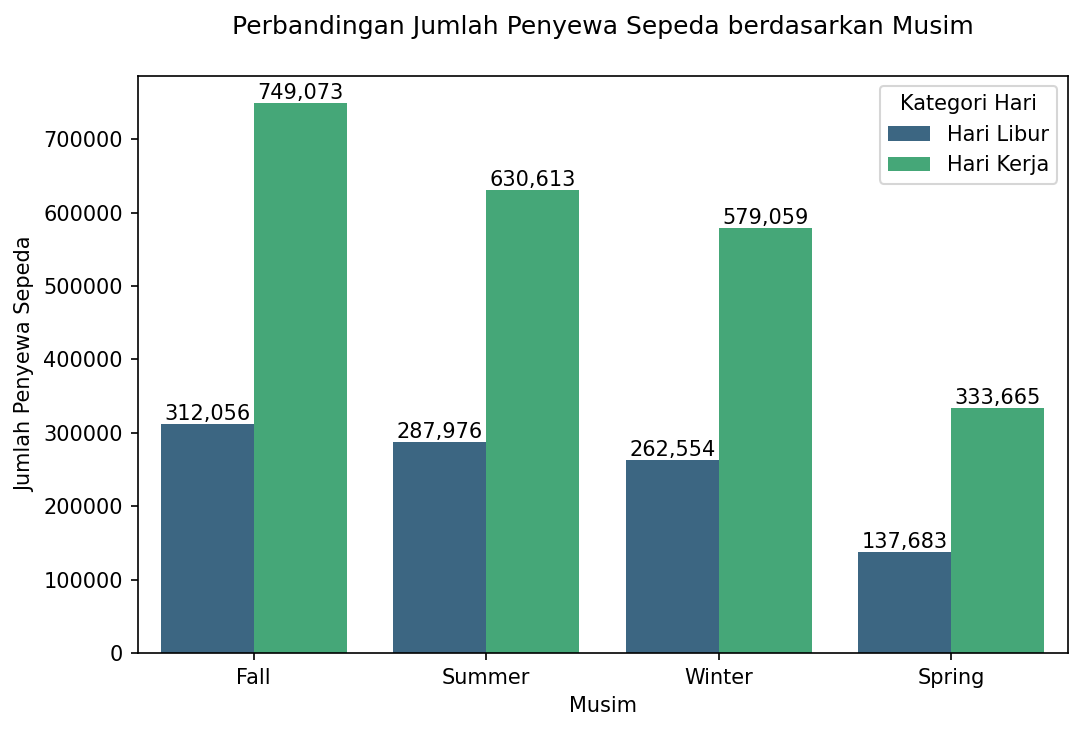

In [277]:
# Mengatur ukuran Kanvas
plt.figure(figsize=(8,5), dpi=150)

# Membuat Grafik Barchart
g = sns.barplot(data=day_df, x='season', y='combined_users', hue='is_workingday', palette='viridis', errorbar=None, estimator=sum, order=day_df_season['season'])

# Mengatur Elemen dari Grafik
plt.title('Perbandingan Jumlah Penyewa Sepeda berdasarkan Musim', pad=20)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa Sepeda')

# Mengubah label legend
handles, labels = g.get_legend_handles_labels()
new_labels = ['Hari Libur', 'Hari Kerja']  
plt.legend(handles, new_labels, title="Kategori Hari", loc='upper right')

# Menampilkan Label Angka pada Grafik
for p in g.patches:
    if p.get_height() > 0:  
        g.annotate(f'{int(p.get_height()):,}',  
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha='center', va='bottom', color='black', fontsize=10)

# Menampilkan Grafik
plt.show()

### Insight

Berdasarkan hasil grafik di atas, mayoritas pengguna menyewa sepeda pada musim Fall, dengan total 749.073 penyewaan pada hari kerja dan 312.056 pada hari libur. Sementara itu, pada musim Summer, jumlah penyewaan menurun menjadi 630.613 pada hari kerja dan 287.976 pada hari libur. Penyewaan semakin rendah pada musim Winter, dengan total 579.059 pada hari kerja dan 262.554 pada hari libur. Musim dengan jumlah penyewaan terendah adalah Spring, dengan total 333.665 penyewaan pada hari kerja dan 137.683 pada hari libur.

### Pertanyaan 5:
Pada jam berapa jumlah peminjaman sepeda mencapai puncaknya dan kapan paling rendah?

In [278]:
# kode ini berguna untuk pengurutan data dalam grafik

hour_df_hour_high = hour_df.groupby('hour').agg({'combined_users':'sum'}).sort_values(by='combined_users',ascending=False).reset_index().head()
hour_df_hour_low = hour_df.groupby('hour').agg({'combined_users':'sum'}).sort_values(by='combined_users',ascending=True).reset_index().head()

C:\Users\USER\AppData\Local\Temp\ipykernel_20504\469833008.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_df_hour_high, x='hour', y='combined_users', palette=["#4682B4", "#A9A9A9", "#A9A9A9", "#A9A9A9", "#A9A9A9"], errorbar=None, estimator=sum, ax=ax[0], order=hour_df_hour_high['hour'])
C:\Users\USER\AppData\Local\Temp\ipykernel_20504\469833008.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_df_hour_low, x='hour', y='combined_users', palette=["#4682B4", "#A9A9A9", "#A9A9A9", "#A9A9A9", "#A9A9A9"], errorbar=None, estimator=sum, ax=ax[1], order=hour_df_hour_low['hour'])


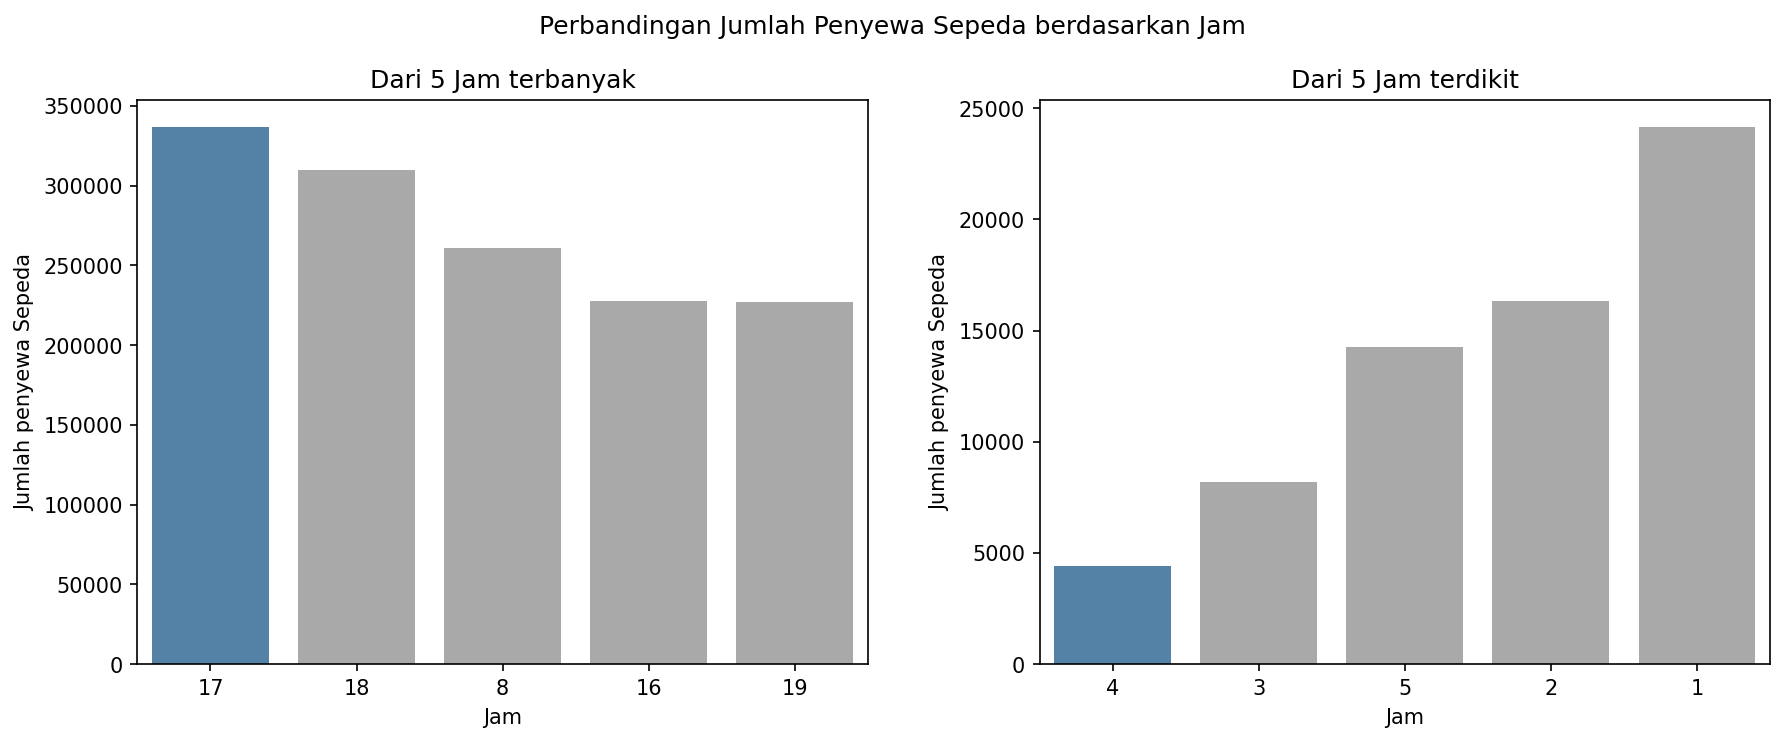

In [279]:
# Mengatur ukuran Kanvas dan menambahkan dua grafik dalam satu kanvas
fig, ax = plt.subplots(figsize=(12,5), dpi=150, ncols=2, nrows=1)

# Membuat Grafik Barchart
sns.barplot(data=hour_df_hour_high, x='hour', y='combined_users', palette=["#4682B4", "#A9A9A9", "#A9A9A9", "#A9A9A9", "#A9A9A9"], errorbar=None, estimator=sum, ax=ax[0], order=hour_df_hour_high['hour'])
sns.barplot(data=hour_df_hour_low, x='hour', y='combined_users', palette=["#4682B4", "#A9A9A9", "#A9A9A9", "#A9A9A9", "#A9A9A9"], errorbar=None, estimator=sum, ax=ax[1], order=hour_df_hour_low['hour'])

# Mengatur Elemen dari Grafik
fig.suptitle('Perbandingan Jumlah Penyewa Sepeda berdasarkan Jam')

ax[0].set_title('Dari 5 Jam terbanyak')
ax[0].set_xlabel('Jam')
ax[0].set_ylabel('Jumlah penyewa Sepeda')

ax[1].set_title('Dari 5 Jam terdikit')
ax[1].set_xlabel('Jam')
ax[1].set_ylabel('Jumlah penyewa Sepeda')

# Menampilkan Grafik
plt.tight_layout(w_pad=3)
plt.show()

### Insight

Dari grafik di atas, dapat dilihat bahwa penyewaan sepeda terbanyak terjadi pada pukul 17:00 dengan lebih dari 300.000 penyewaa. Sementara itu, penyewaan paling sedikit terjadi pada pukul 04:00 dengan kurang dari 5000 penyewaan.

## Analisis Lanjutan (Opsional)

- Pertanyaan nomor 6 dan 7 memerlukan teknik analisis lanjutan yaitu clustering dan RFM untuk menjawabnya

In [280]:
day_df.head()

,date,season,year,month,weekday,is_workingday,weather_condition,temperature,feeling_temperature,humidity,windspeed,casual_users,registered_users,combined_users
0,2011-01-01,Spring,2011,January,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,2011,January,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,2011,January,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,2011,January,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,2011,January,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Pertanyaan 6:
Bagaimana hubungan antara faktor lingkungan seperti temperatur, kecepatan angin, dan kelembaban dengan jumlah peminjaman sepeda?

#### Clustering
- kita perlu membuat cluster berdasarkan temperatur, kecepatan angin, dan kelembaban

In [281]:
# Temperature
def temperature_cluster(temp):
    if temp < 10:
        return "Cold"
    elif 10 <= temp <= 25:
        return "Mild"
    else:
        return "Hot"

day_df["temperature_cluster"] = day_df["temperature"].apply(temperature_cluster)
day_df.groupby("temperature_cluster")["combined_users"].sum()

temperature_cluster
Cold     100666
Hot     1362977
Mild    1829036
Name: combined_users, dtype: int64

In [282]:
# Kecepatan angin
def wind_cluster(wind):
    if wind < 10:
        return "Calm"
    elif 10 <= wind <= 20:
        return "Breezy"
    else:
        return "Windy"

day_df["wind_cluster"] = day_df["windspeed"].apply(wind_cluster)
day_df.groupby("wind_cluster")["combined_users"].sum()

wind_cluster
Breezy    1865873
Calm      1189819
Windy      236987
Name: combined_users, dtype: int64

In [283]:
# Kelembaban

def humidity_cluster(hum):
    if hum < 40:
        return "Dry"
    elif 40 <= hum <= 70:
        return "Moderate"
    else:
        return "Humid"

day_df["humidity_cluster"] = day_df["humidity"].apply(humidity_cluster)
day_df.groupby("humidity_cluster")["combined_users"].sum()

humidity_cluster
Dry          126001
Humid        932656
Moderate    2234022
Name: combined_users, dtype: int64

- Setelah itu perlu membuat hasilnya dalam visualisasi

In [284]:
# kode ini berguna untuk pengurutan data dalam grafik
day_df_temp = day_df.groupby("temperature_cluster")["combined_users"].sum().sort_values(ascending=False).reset_index()
day_df_wind = day_df.groupby("wind_cluster")["combined_users"].sum().sort_values(ascending=False).reset_index()
day_df_hum  = day_df.groupby("humidity_cluster")["combined_users"].sum().sort_values(ascending=False).reset_index() 

C:\Users\USER\AppData\Local\Temp\ipykernel_20504\1526999849.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df_temp, x='temperature_cluster', y='combined_users', palette=["#4682B4", "#A9A9A9", "#A9A9A9"], errorbar=None, estimator=sum, ax=ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_20504\1526999849.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df_wind, x='wind_cluster', y='combined_users', palette=["#4682B4", "#A9A9A9", "#A9A9A9"], errorbar=None, estimator=sum, ax=ax[1])
C:\Users\USER\AppData\Local\Temp\ipykernel_20504\1526999849.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

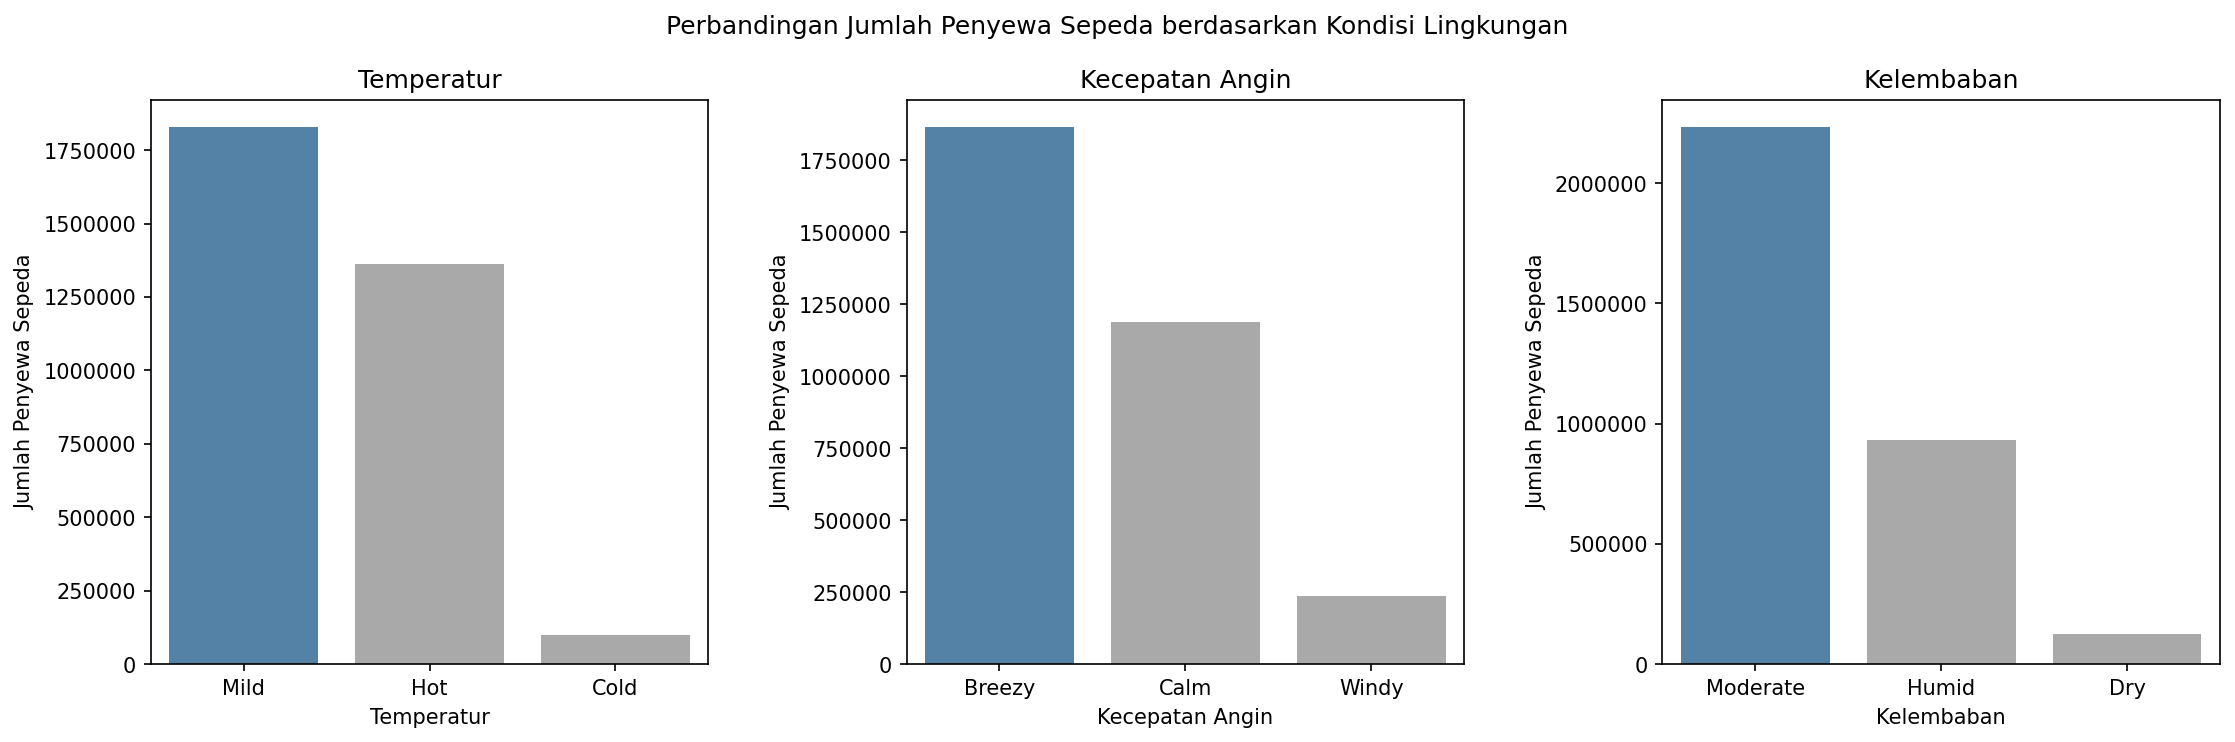

In [285]:
# Mengatur ukuran Kanvas dan menambahkan tiga grafik dalam satu kanvas
fig, ax = plt.subplots(figsize=(15,5), dpi=150, ncols=3, nrows=1)

# Membuat Grafik Barchart
sns.barplot(data=day_df_temp, x='temperature_cluster', y='combined_users', palette=["#4682B4", "#A9A9A9", "#A9A9A9"], errorbar=None, estimator=sum, ax=ax[0])
sns.barplot(data=day_df_wind, x='wind_cluster', y='combined_users', palette=["#4682B4", "#A9A9A9", "#A9A9A9"], errorbar=None, estimator=sum, ax=ax[1])
sns.barplot(data=day_df_hum, x='humidity_cluster', y='combined_users', palette=["#4682B4", "#A9A9A9", "#A9A9A9"], errorbar=None, estimator=sum, ax=ax[2])

# Mengatur Elemen dari Grafik
fig.suptitle('Perbandingan Jumlah Penyewa Sepeda berdasarkan Kondisi Lingkungan')

ax[0].set_title('Temperatur')
ax[0].set_xlabel('Temperatur')
ax[0].set_ylabel('Jumlah Penyewa Sepeda')
ax[0].ticklabel_format(style='plain', axis='y')

ax[1].set_title('Kecepatan Angin')
ax[1].set_xlabel('Kecepatan Angin')
ax[1].set_ylabel('Jumlah Penyewa Sepeda')
ax[1].ticklabel_format(style='plain', axis='y')

ax[2].set_title('Kelembaban')
ax[2].set_xlabel('Kelembaban')
ax[2].set_ylabel('Jumlah Penyewa Sepeda')
ax[2].ticklabel_format(style='plain', axis='y')

# Menampilkan Grafik
plt.tight_layout(w_pad=3)
plt.show()

### Insight

- Berdasarkan grafik di atas, dapat dilihat bahwa user yang menyewa sepada terbanyak pada saat suhu mild dengan sekitar 1.750.000, kecepatan angin breezy dengan sekitar dari 1.750.000, serta kelembaban moderate dengan lebih dari 2.000.000. Sebaliknya, jumlah penyewaan paling sedikit terjadi pada suhu dingin dengan kurang dari 250.000, kecepatan angin windy dengan kurang dari 250.000, serta kelembaban kering dengan kurang dari 250.000. 

### Pertanyaan 7:
Kapan terakhir kali penyewaan sepeda mencapai puncaknya, serta bagaimana tingkat frekuensi dan total penyewaan dari masing-masing kelompok pengguna?

#### Analysis RFM

- Pertanyaan terakhir bisa dijawab dengan teknik RFM dimana sebagai berikut:
    - R : Kapan terakhir kali penyewaan sepeda mencapai puncaknya?
    - F : seberapa sering casual dan registered user menyewa sepeda?
    - M : Berapa total sepeda yang telah disewa oleh casual dan registered user?

In [286]:
# Menghitung Recency (R)
daily_rentals = day_df.groupby('date').agg({'casual_users':'sum', 'registered_users': 'sum'}).reset_index()
last_date = daily_rentals['date'].max()

peak_rental_day_casual = daily_rentals.loc[daily_rentals['casual_users'].idxmax()]
peak_rental_day_registered = daily_rentals.loc[daily_rentals['registered_users'].idxmax()]

recency_days_casual = (last_date - peak_rental_day_casual["date"]).days
recency_days_registered = (last_date - peak_rental_day_registered["date"]).days


# Menghitung Frequency (F) 
frequency_casual = daily_rentals['casual_users'].count()
frequency_registered = daily_rentals['registered_users'].count()

# Menghitung Monetary (M) 
monetary_casual = daily_rentals['casual_users'].sum()
monetary_registered = daily_rentals['registered_users'].sum()

# Membuat DataFrame RFM
rfm_df = pd.DataFrame({
    'User' : ['Casual Users', 'Registered Users'],
    'Recency (days)': [recency_days_casual, recency_days_registered],
    'Frequency (times)': [frequency_casual, frequency_registered],
    'Monetary (total bike sharing)': [monetary_casual, monetary_registered]
})

# Menampilkan hasil
rfm_df


,User,Recency (days),Frequency (times),Monetary (total bike sharing)
0,Casual Users,226,731,620017
1,Registered Users,96,731,2672662


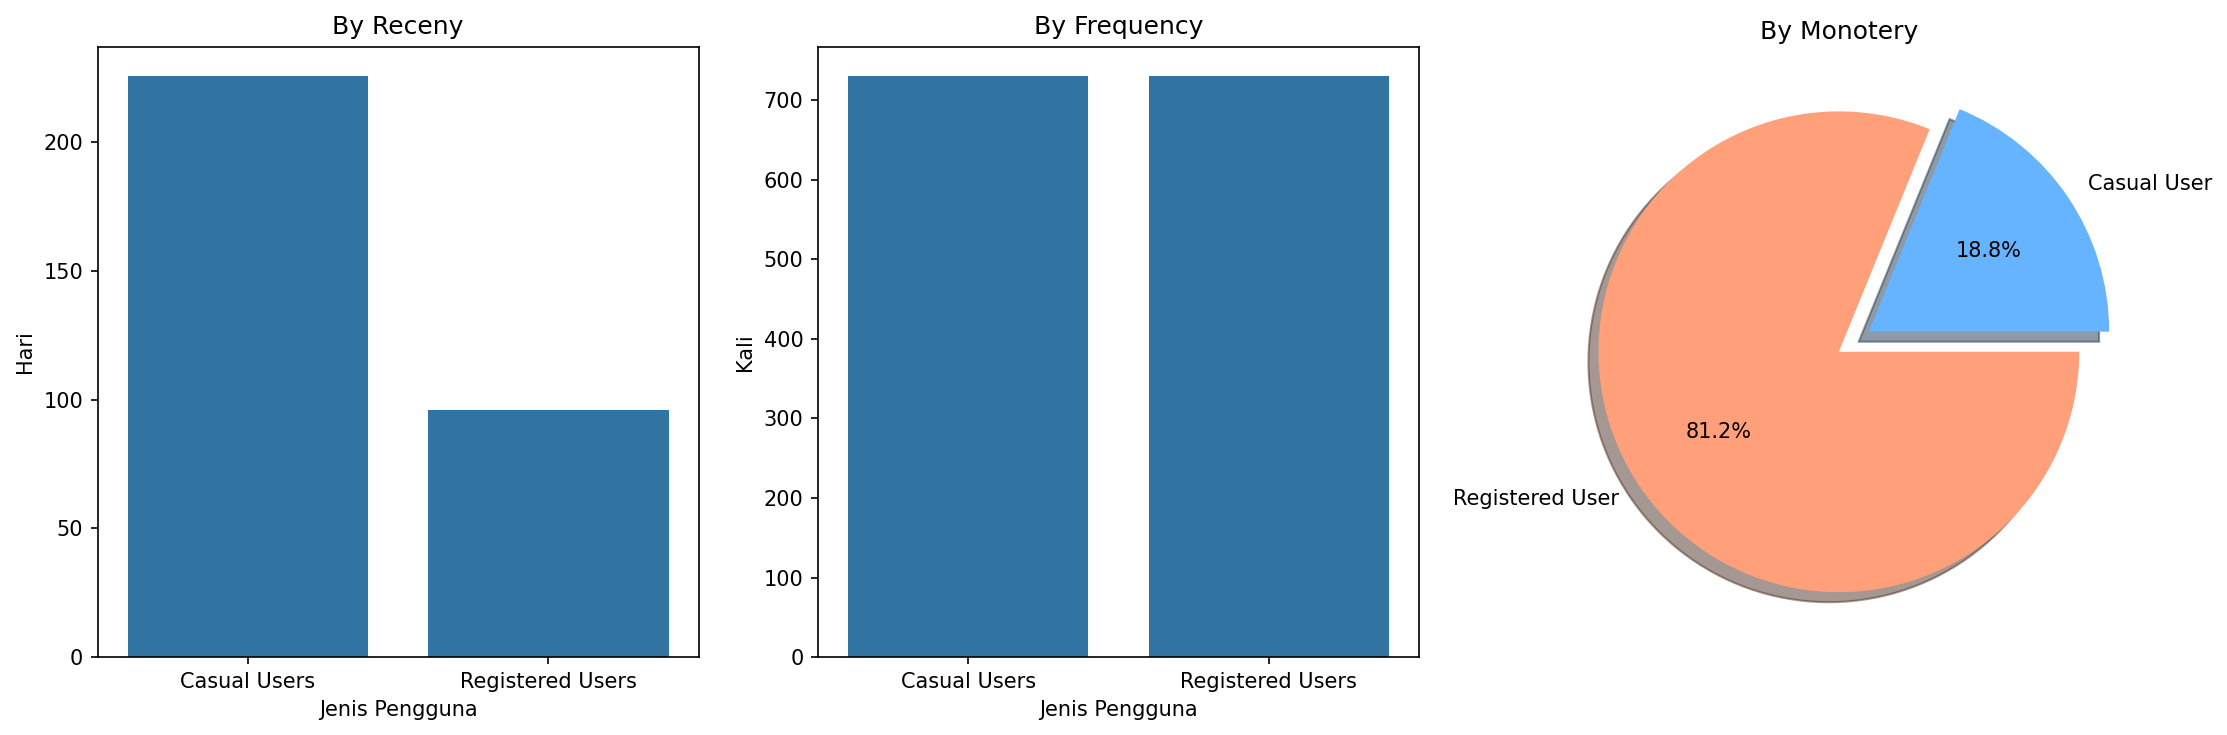

In [287]:
# Mengatur ukuran Kanvas dan menambahkan tiga grafik dalam satu kanvas
fig, ax = plt.subplots(figsize=(15,5), dpi=150, ncols=3, nrows=1)

# Membuat Grafik Barchart
sns.barplot(data=rfm_df, x='User', y='Recency (days)', errorbar=None, estimator=sum, ax=ax[0])
sns.barplot(data=rfm_df, x='User', y='Frequency (times)', errorbar=None, estimator=sum, ax=ax[1])


# Menampilkan pie plot
ax[2].pie(
        x=day_df[['casual_users', 'registered_users']].sum(), 
        labels=['Casual User', 'Registered User'], 
        explode=[0.15, 0],
        autopct='%1.1f%%',
        colors = ['#66B3FF', '#FFA07A'],
        shadow=True
)

# Mengatur Elemen dari Grafik
ax[0].set_title('By Receny')
ax[0].set_xlabel('Jenis Pengguna')
ax[0].set_ylabel('Hari')
ax[0].ticklabel_format(style='plain', axis='y')

ax[1].set_title('By Frequency')
ax[1].set_xlabel('Jenis Pengguna')
ax[1].set_ylabel('Kali')
ax[1].ticklabel_format(style='plain', axis='y')

ax[2].set_title('By Monotery')

# Menampilkan Grafik
plt.tight_layout()
plt.show()

### Insight

- Casual Users mengalami lonjakan penyewaan terakhir kali 226 hari sebelum hari terakhir, sedangkan Registered Users mengalami lonjakan 96 hari sebelumnya. Kemudian, jumlah total penyewaan oleh Registered Users mencapai 2.67 juta, jauh lebih besar dibandingkan Casual Users yang hanya 620 ribu, menunjukkan bahwa pengguna Registered lebih dominan dalam penyewaan sepeda. Lalu, frekuensi penyewaan oleh masing-masing user selama 731 hari (sekitar 2 tahun). 

# Conclustion

1. Berdasarkan performa dari tahun 2011 ke 2012, jumlah penyewa sepeda menunjukkan tren meningkat, menandakan semakin tingginya minat user terhadap layanan bike sharing. Puncak penggunaan terjadi pada Q2 dan Q3 (April-September). Adapun strategi yang bisa dilakukan adalah ketika mengalami peningkatan bisa menambahkan lebih banyak sepeda atau promosi selama puncak musim. Sebaliknya, ketika memasuki Q4 (Oktober-Desember) mengalami penurunan signifikan setiap tahun. Strategi yang bisa diterapkan pada waktu ini adalah dengan menerapkan harga diskon atau promosi lainnya di Q4.

2. Jumlah user yang menyewa sepeda lebih tinggi pada hari kerja dibandingkan hari libur, menunjukkan bahwa mayoritas pengguna memanfaatkan layanan ini sebagai sarana transportasi harian. Meskipun, penyewaan di hari libur lebih rendah dibandingkan hari kerja namun jumlah yang menyewa tetaplah banyak sehingga dapat menjadi peluang untuk menarik lebih banyak pengguna rekreasional. Strategi seperti promo akhir pekan atau acara komunitas bersepeda bisa diterapkan untuk meningkatkan pemakaian di hari libur.

3. Mayoritas user menyewa sepeda saat cuaca cerah yang menunjukkan preferensi pengguna terhadap kondisi cuaca ideal. Meski begitu, masih ada user yang menyewa saat cuaca kurang baik seperti berkabut atau hujan salju ringan, mengindikasikan adanya segmen pengguna yang mengandalkan sepeda untuk kebutuhan harian. Selisih yang signifikan antar kondisi cuaca menunjukkan potensi strategi bisnis, seperti promo di cuaca kurang ideal atau penyediaan perlengkapan tambahan.

4. Hampir kebanyakan user menyewa sepeda saat musim Fall, sementara musim Spring memiliki tingkat penyewaan terendah. Selain itu, pada semua musim, peminjaman sepeda lebih tinggi pada hari kerja dibandingkan hari libur, menunjukkan bahwa user menggunakan sepeda untuk keperluan transportasi daripada sekadar rekreasi. Dengan demikian, musim Fall memiliki peluang terbesar untuk meningkatkan layanan penyewaan, misalnya dengan menambah jumlah sepeda. Sementara itu, musim Spring bisa menjadi ajang fokus promosi untuk membuat user tertarik menyewa sepeda, seperti memberikan diskon penyewaan atau mengadakan acara komunitas bersepeda musiman.

5. Berdasarkan jam terlihat bahwa mayoritas penyewaan sepeda terjadi pada sore hari, dengan puncaknya pada pukul 17:00. Hal ini mengindikasikan tingginya penggunaan sepeda sebagai sarana transportasi setelah aktivitas sehari-hari. Meskipun demikian, terdapat satu pengecualian pada pukul 08:00, yang menunjukkan bahwa pagi hari juga menjadi waktu yang cukup populer bagi pengguna, kemungkinan terkait dengan mobilitas menuju tempat kerja atau aktivitas lainnya. Sebaliknya, jumlah penyewaan paling sedikit tercatat pada pukul 04:00. Hal ini dikarenakan minimnya aktivitas pada dini hari.

6. User menyewa sepeda paling tinggi pada kondisi lingkungan yang nyaman, seperti suhu yang sedang (mild), angin sepoi-sepoi (breezy), dan kelembaban moderat, yang menunjukkan preferensi mereka terhadap cuaca yang mendukung aktivitas luar ruangan. Sebaliknya, jumlah peminjaman menurun signifikan pada suhu dingin, angin kencang, dan kelembaban rendah, yang kemungkinan besar disebabkan oleh kenyamanan dan faktor keamanan. Hal ini dapat menjadi pertimbangan dalam strategi bisnis, seperti penyediaan fasilitas tambahan pada kondisi lingkungan yang kurang ideal.

7. Berdasarkan hasil analisis RFM terlihat bahwa registered user lebih dominan dalam penyewaan sepeda dibandingkan casual user. Untuk menarik lebih banyak user di hari yang akan datang dapat dilakukan berbagai program menarik program langganan bulanan spesial, reward setelah penyewaan tertentu, atau benefit tambahan lainnya.

### Pembuatan Dashboard
- Untuk proses ini akan dilanjutkan melalui streamlit

In [290]:
# Menyimpan hasil data yang digunakan untuk Membuat Dashboard

day_df.to_csv('day_cleaned.csv', index=False)
hour_df.to_csv('hour_cleaned.csv', index=False)